In [1]:
library(tidyverse)
library(tidymodels)
library(hms)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Reads the CSV, changes the format of the columns of `start_time` and `end_time` to POSIXct objects.

In [2]:
id <- "14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_df <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))

sessions_df

sessions_df_start_time_end_time <- sessions_df|>
    mutate(start_time = with_tz(as_datetime(dmy_hm(start_time )), tz = "America/Vancouver"))|>
    mutate(end_time = with_tz(as_datetime(dmy_hm(end_time)), tz = "America/Vancouver"))|>
    mutate(play_time = as.numeric(str_extract_all(end_time - start_time, "\\d+")))|>
    mutate(hms_start = as_hms(start_time))|>
    mutate(hms_end = as_hms(end_time))|>
    mutate(hour_start = hour(start_time))|>
    mutate(hour_end = hour(end_time))|>
    mutate(month = month(start_time))|>
    select(hashedEmail, start_time, end_time, month, hms_start, hms_end, hour_start, hour_end, play_time)|>
    arrange(start_time)|>
    drop_na()

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Creates a list `tinterval` containing every time interval between the start time of the first play session `start.min` and the end time of the latest play session `end.max`

In [3]:
start.min <- min(sessions_df_start_time_end_time$start_time, na.rm=T)
end.max <- max(sessions_df_start_time_end_time$end_time, na.rm=T)
tinterval <- seq.POSIXt(start.min, end.max, by = "mins")

Creates a new dataframe `session_df_by_minute` containing the number of players online between `start.min` and `end.max`. (I'm not sure what happens here but it works?)

In [4]:
player_count <- sapply(tinterval, function(tt) sum(sessions_df_start_time_end_time$start_time <= tt & tt <= sessions_df_start_time_end_time$end_time))
session_df_by_minute <- data.frame(tinterval, player_count)|>
        arrange(tinterval)

Creates new factors `month`, `wday`, `is_weekday`, and `is_summer_vacation` for further analysis of categories

In [5]:
session_df_by_minute_factors <- session_df_by_minute|>
    mutate(month = as_factor(month(tinterval)))|>
    mutate(wday = as_factor(wday(tinterval)))|>
    mutate(is_weekday = as_factor(ifelse( wday == 6 | wday == 7, 0, 1)))|>
    mutate(is_summer_vacation = as_factor(ifelse(  month == 7 | month == 8 , 1, 0)))|>
    mutate(hms = as_hms(tinterval))|>
    arrange(tinterval)
session_df_by_minute_factors

tinterval,player_count,month,wday,is_weekday,is_summer_vacation,hms
<dttm>,<int>,<fct>,<fct>,<fct>,<fct>,<time>
2024-04-06 02:27:00,1,4,7,0,0,02:27:00
2024-04-06 02:28:00,1,4,7,0,0,02:28:00
2024-04-06 02:29:00,1,4,7,0,0,02:29:00
2024-04-06 02:30:00,1,4,7,0,0,02:30:00
2024-04-06 02:31:00,1,4,7,0,0,02:31:00
2024-04-06 02:32:00,0,4,7,0,0,02:32:00
2024-04-06 02:33:00,0,4,7,0,0,02:33:00
2024-04-06 02:34:00,0,4,7,0,0,02:34:00
2024-04-06 02:35:00,1,4,7,0,0,02:35:00


Average Plot (do we even use this?)

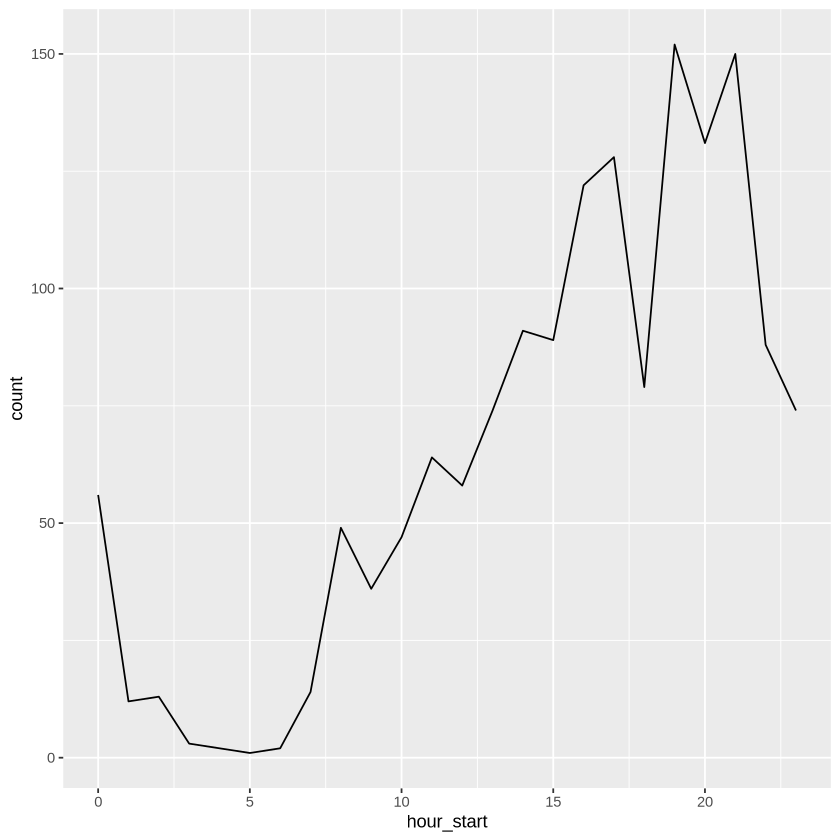

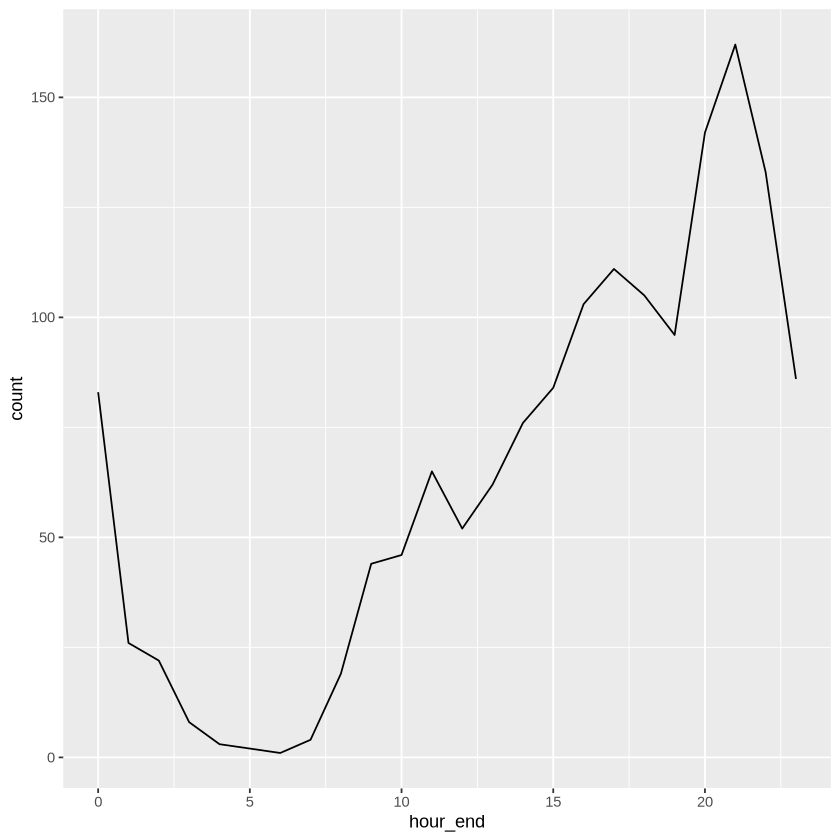

In [6]:
count_hourly_start <- sessions_df_start_time_end_time|>
    group_by( hour_start)|>
    summarize( count = n()) 
count_hourly_end <- sessions_df_start_time_end_time|>
    group_by( hour_end)|>
    summarize( count = n())
plot_hourly_start <- count_hourly_start|>
    ggplot( aes( x = hour_start, y = count))+
    geom_line()
plot_hourly_end <- count_hourly_end|>
    ggplot( aes( x = hour_end, y = count))+
    geom_line()
plot_hourly_start
plot_hourly_end

In [7]:
average_user_online_factors <- session_df_by_minute_factors|>
    group_by(hms)|>
    summarize( average_online_users = mean(player_count))

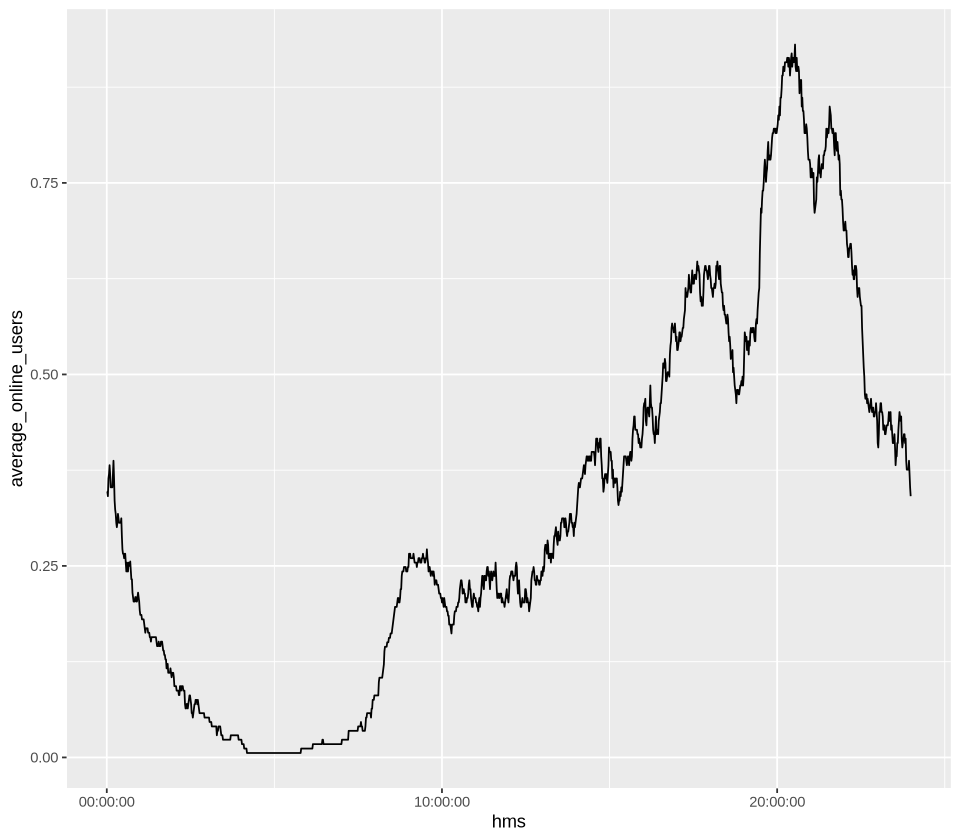

In [8]:
plot_average_user_online_by_minute <- average_user_online_factors|>
    ggplot(aes(x = hms , y = average_online_users))+
        geom_line()

options(repr.plot.width = 8, repr.plot.height= 7)
plot_average_user_online_by_minute


In [9]:
whisker_plot <- ggplot(session_df_by_minute_factors, aes( tinterval, player_count))+
                         geom_boxplot(aes(group = cut_width(tinterval, 01:00:00)))

In [10]:
whisker_plot

Warning message in 1:0:0:
“numerical expression has 2 elements: only the first used”
ERROR while rich displaying an object: Error in `geom_boxplot()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `seq.default()`:
! 'from' must be of length 1

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (